In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data = pd.read_csv(r"C:/Users/shobhitkumar/Desktop/ML_Practice/Statistics/PlantGrowth.csv")
data.head()

,Unnamed: 0,weight,group
0,1,4.17,ctrl
1,2,5.58,ctrl
2,3,5.18,ctrl
3,4,6.11,ctrl
4,5,4.50,ctrl


In [20]:
data.shape

(30, 3)

<AxesSubplot:xlabel='weight', ylabel='group'>

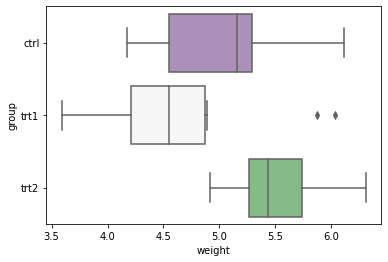

In [14]:
# creating boxplot
# data.boxplot('weight', by='group',figsize=(12,8))
sns.boxplot(x="weight", y="group", data=data, palette= "PRGn")

In [8]:
ctrl= data['weight'][data.group=='ctrl']
grps= pd.unique(data.group.values)

In [9]:
d_data={grp:data['weight'][data.group==grp] for grp in grps}

In [15]:
k = len(pd.unique(data.group)) # No. of conditions
N = len(data.values) # total no. of values
n = data.groupby('group').size()[0] # observations in each observation

# ANOVA TEST

In [18]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

mod = ols('weight ~ group', data=data).fit()
anov_table = sm.stats.anova_lm(mod, typ=2)
print (anov_table)

            sum_sq    df         F   PR(>F)
group      3.76634   2.0  4.846088  0.01591
Residual  10.49209  27.0       NaN      NaN


In [19]:
# we reject the null hypothesis as p-value < 0.05
# F- stats is saying the same thing

# Tukey's Test

In [24]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

MC = MultiComparison(data['weight'], data['group'])
result = MC.tukeyhsd()
print (result)
print (MC.groupsunique)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
  ctrl   trt1   -0.371 0.3921 -1.0621 0.3201  False
  ctrl   trt2    0.494  0.198 -0.1971 1.1851  False
  trt1   trt2    0.865  0.012  0.1739 1.5561   True
---------------------------------------------------
['ctrl' 'trt1' 'trt2']


In [ ]:
# We will consider trt1 and trt2